# Machine Learning with Scikit Learn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Linear Regression in Machine Learning

#### House Price Prediction Model

In [2]:
data= pd.read_csv('../CSV/housing.csv')

features= ['bedrooms','bathrooms','sqft_living']
target= 'price'

X= data[features]
Y= data[target].astype(int)

X_train, X_test, Y_train, Y_test= train_test_split(X,Y)

model= LinearRegression()
model.fit(X_train,Y_train)

input= [[5, 3,3650]]
predictions= model.predict(input)
# predictions= model.predict(X_test)

print(f'Total Price: { predictions[0]:.2f}')


Total Price: 876987.20


d:\Tech\Artificial Intelligence\Python Libraries\.env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Model to predict Population for a country

In [3]:
# wp= pd.read_csv('../CSV/world_population.csv')
data = {
    'Year': [2022, 2020,2015, 2010, 2000, 1990, 1980,1970],
    'Population': [1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301]  # Example: India
}

data = pd.DataFrame(data)

X= data[['Year']]
Y= data['Population']

X_train, X_test, Y_train, Y_test= train_test_split(X,Y)

model= LinearRegression()
model.fit(X_train,Y_train)

input= [[2025]]
predictions= model.predict(input)

# print(predictions)
print(f'Population: { predictions[0]:.0f}')



Population: 1496995859


d:\Tech\Artificial Intelligence\Python Libraries\.env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##### Datasets in sklearn

In [4]:
from sklearn.datasets import load_digits

X,Y= load_digits(return_X_y=True)

print(X,Y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


In [5]:
# 1. Linear Regression(Single Regression, Multiple Regression)
# 2. Logistic Regression (Binary Classification, Multi-class Classification, ) 

#### Model to predict price of used Car

## Logistic Regression

##### 1. Predict student fail or pass by using Study Hours

In [6]:
# study hours
X= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14]).reshape(-1,1)
# fail, pass
Y= np.array([0,0,0,1,1,0,1,1,0,1,1,0,1,1])

model= LogisticRegression()

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=42)

# print(X_test)

model.fit(X_train,Y_train)

studyhour= [[8]]
predictions= model.predict(studyhour)

# Checking Probability

probability= model.predict_proba(studyhour)

# probability[:,1]
print(f"{probability[0][1]:.2f}")
# print("Preductuion",predictions)

0.71


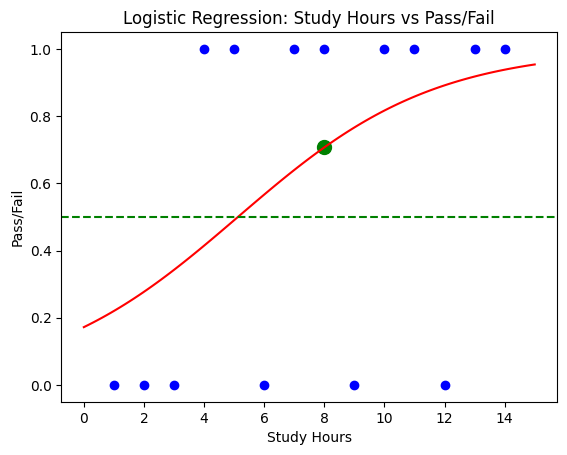

In [7]:
## Create Graph for above example

x_test= np.linspace(0, 15, 100).reshape(-1,1)
y_prob= model.predict_proba(x_test)

# print(y_prob[:,1])

plt.scatter(X,Y, color='blue')
plt.scatter(studyhour, probability[0][1], color='green', marker='o', s=100, label='Prediction')
plt.plot(x_test, y_prob[:,1],color='red')

#Labels
plt.xlabel('Study Hours')
plt.ylabel('Pass/Fail')
plt.title('Logistic Regression: Study Hours vs Pass/Fail')

# Central line
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary')
plt.show()




##### 2. Predicting Cancer

In [8]:
from sklearn.datasets import load_breast_cancer

X,Y= load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test= train_test_split(X,Y, random_state=42)

model = LogisticRegression()
model.fit(x_train,y_train)

# input= [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9, 1.0]]
predictions= model.predict(x_test)

print(predictions)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]


d:\Tech\Artificial Intelligence\Python Libraries\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
